In [3]:
github_username = "lanvu301"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/lanvu301/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments


# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experience is to compare the effectiveness of three different teaching methods on graduate students understanding of hypothesis testing

**Question 2.** Specify the outcome variable

The student quiz score

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

Independent variable is "teaching_method" and the block factor is "prior_knowledge"

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate because students differ in their prior knowledge which can contribute to their quiz score. Students can have different starting from within the same teaching methods groups

**Question 5.** State the null and alternative hypotheses for this experiment.

$$ H_0: \mu_{\text{1}} = \mu_{\text{2}} = μ_{\text{3}} $$

$$ H_1:  At  least 1 \mu_{\text{i}} is different $$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset
file_path = "/content/STAT-7220-Applied-Experimental-Design/Assignments/HW2/Data Science Teaching Method.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Summary statistics grouped by Teaching Method and Prior Knowledge
summary_stats = df.groupby(['Teaching_Method', 'Prior_Knowledge'])['Score'].describe()

summary_stats




count    mean       std    min      25%  \
Teaching_Method Prior_Knowledge                                            
Collaborative   High              10.0  90.927  7.970758  76.62  88.3125   
                Low               10.0  82.176  8.168793  69.97  74.9625   
Direct          High              10.0  76.998  6.125899  69.25  73.4600   
                Low               10.0  73.659  6.623811  59.89  74.1525   
Inquiry         High              10.0  88.624  5.316835  79.77  85.1000   
                Low               10.0  81.903  5.984395  72.05  77.8425   

                                    50%      75%     max  
Teaching_Method Prior_Knowledge                           
Collaborative   High             91.165  91.8775  105.06  
                Low              82.450  89.6625   91.86  
Direct          High             75.930  80.7775   88.61  
                Low              75.730  76.7450   80.20  
Inquiry         High             88.390  92.3175   98.18  
                Low              80.755  86.6275   91.10

We have students with high prior knowledge have higher score.


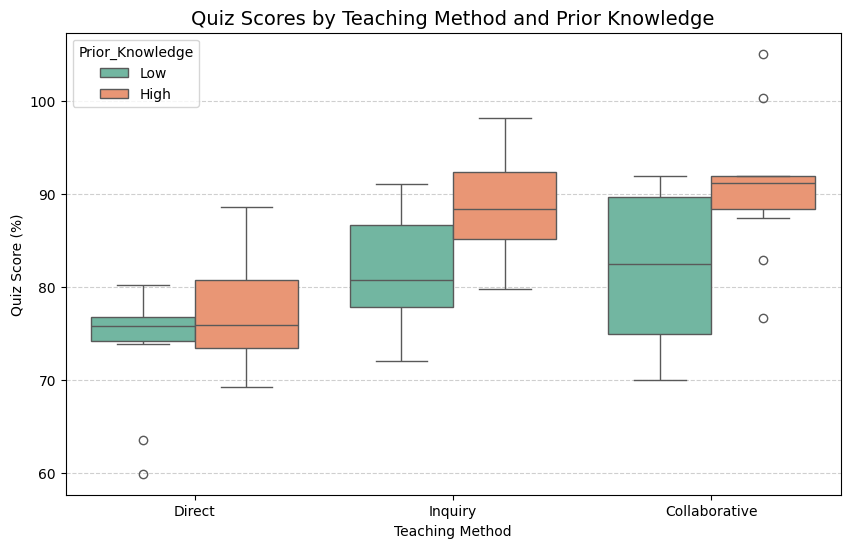

In [5]:
# Visualization: Boxplot of scores by teaching method and prior knowledge
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Teaching_Method', y='Score', hue='Prior_Knowledge', palette='Set2')
plt.title("Quiz Scores by Teaching Method and Prior Knowledge", fontsize=14)
plt.ylabel("Quiz Score (%)")
plt.xlabel("Teaching Method")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

From the boxplot, we can tell that collaborative and inquiry teaching method generally perform better and direct.
Based on the both summary statistics and the boxplot visualization, the evidence appearrs to suopport the alternative hypothesis.
Students in the Collaborative Learning and Inquiry-based learning workshops achieved higher mean quiz scores compared to those in the Direct instruction group.
This analysis suggest that teaching method does have an effect on students study outcome


**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


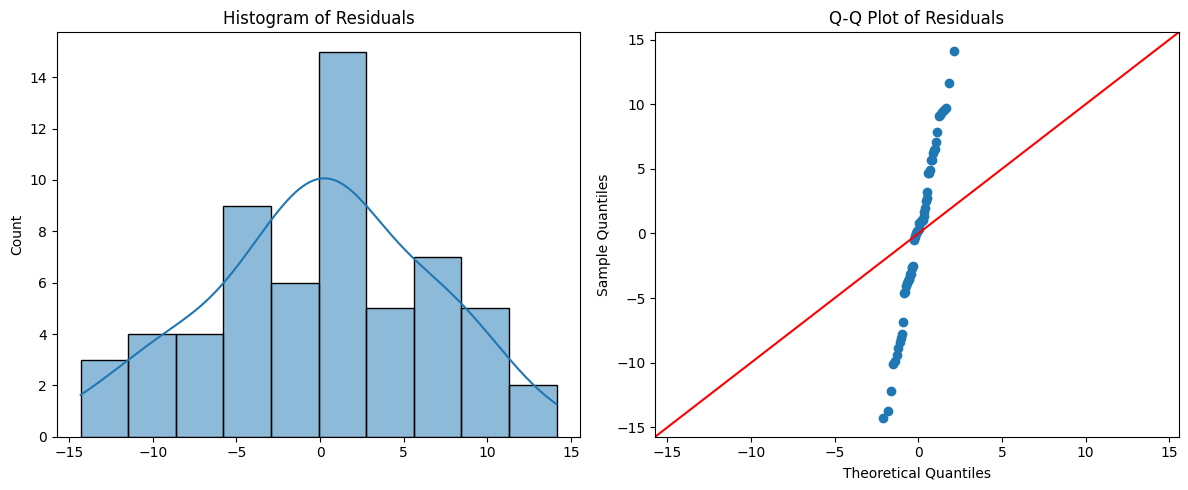

(                                            sum_sq    df          F    PR(>F)
 C(Teaching_Method)                     1508.792653   2.0  16.415063  0.000003
 C(Prior_Knowledge)                      589.756202   1.0  12.832625  0.000731
 C(Teaching_Method):C(Prior_Knowledge)    74.747613   2.0   0.813224  0.448782
 Residual                               2481.708550  54.0        NaN       NaN,
 ShapiroResult(statistic=np.float64(0.984313332289175), pvalue=np.float64(0.6343906841745357)))

In [6]:
# Reimport and re-run analysis after environment reset
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Two-way ANOVA model
model = ols('Score ~ C(Teaching_Method) * C(Prior_Knowledge)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Residuals
residuals = model.resid

# Shapiro-Wilk normality test
shapiro_test = shapiro(residuals)

# Visual normality check
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(residuals, bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

# Q-Q plot
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

anova_table, shapiro_test



**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?


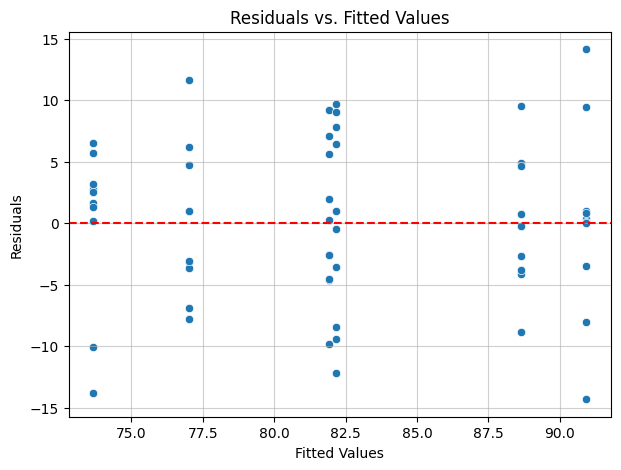

LeveneResult(statistic=np.float64(0.5485846192428719), pvalue=np.float64(0.738650578588933))

In [7]:
from scipy.stats import levene

# Levene's Test for Homogeneity of Variance
levene_test = levene(
    *[group["Score"].values for name, group in df.groupby(["Teaching_Method", "Prior_Knowledge"])]
)

# Visual check: residuals vs fitted values plot
fitted = model.fittedvalues

plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(alpha=0.6)
plt.show()

levene_test


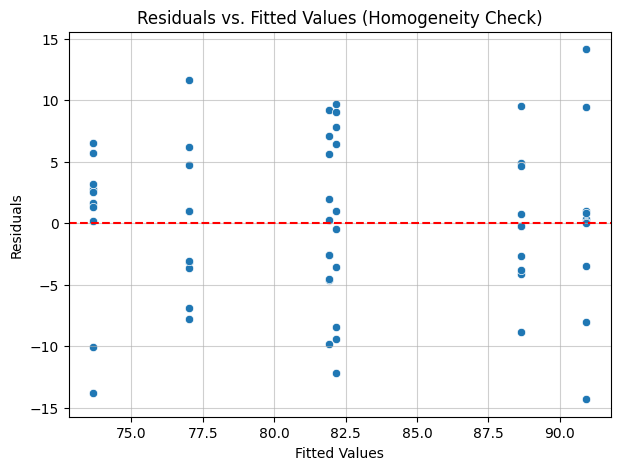

LeveneResult(statistic=np.float64(0.5485846192428719), pvalue=np.float64(0.738650578588933))

In [8]:
model = ols('Score ~ C(Teaching_Method) * C(Prior_Knowledge)', data=df).fit()
residuals = model.resid
fitted = model.fittedvalues

# Levene's test for homogeneity of variances across groups
levene_test = levene(
    *[group["Score"].values for name, group in df.groupby(["Teaching_Method", "Prior_Knowledge"])]
)

# Residuals vs Fitted Values Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values (Homogeneity Check)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(alpha=0.6)
plt.show()

levene_test


**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



The F-statistic (16.42) is large, and the p-value (0.000003) is far below the 0.05 significance level, indicating a statistically significant effect of teaching method on quiz scores.
This means that not all teaching methods produce the same mean quiz score, at least one method leads to significantly higher or lower performance.

The alternative hypothesis is more strongly supported.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Score'], groups=df['Teaching_Method'], alpha=0.05)

print(tukey.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -11.223    0.0 -16.8766 -5.5694   True
Collaborative Inquiry   -1.288 0.8478  -6.9416  4.3656  False
       Direct Inquiry    9.935 0.0003   4.2814 15.5886   True
-------------------------------------------------------------


Collaborative and Direct Instruction have significant difference.
Students in Collaborative Learning scored on average 11.2 points higher than those in Direct Instruction.
Inquiry-Based and Direct Instruction also have significant difference.
Students in Inquiry-Based Learning scored 9.9 points higher than those in Direct Instruction.
Collaborative and Inquiry-Based have no significant difference.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

The results of this experiment indicate that teaching method has a significant effect on students’ understanding of hypothesis testing. Both Collaborative Learning and Inquiry-Based Learning produced significantly higher mean quiz scores compared to Direct Instruction, suggesting that active, student-centered approaches can improve understanding more effectively than traditional teaching methods. Prior knowledge also had a significant impact on performance, with students possessing higher baseline understanding scoring better overall. However, there was no significant interaction between teaching method and prior knowledge, this show that the benefits of active learning were consistent for both knowledge groups.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to evaluate the effectiveness of four different online learning platforms on student engagement in an undergraduate data science course. The study aims to determine whether mean engagement levels differ significantly among the platforms, while controlling for the potential effects of Day of the Week and Time of Day

**Question 2.** Specify the outcome variable

Student Engagement

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

Independent Variable: Online Learning Platform

Blocking Factors: Day of the Week and Time of Day

Some lurking variables can be class size, teaching style, internet or technology access

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

A Latin Square Design is appropriate because there are two known sources of variation that we want to control

A completely randomized design would be inappropriate because it would not control for systematic variation caused by the day or time of day — confounding the platform effects.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null Hypthesis: There are no difference in mean student engagement in different goups

Alternative hypothesis: There are at least one group of different in means

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



/tmp/ipython-input-2179514408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Platform', y='Engagement', palette='Set2')


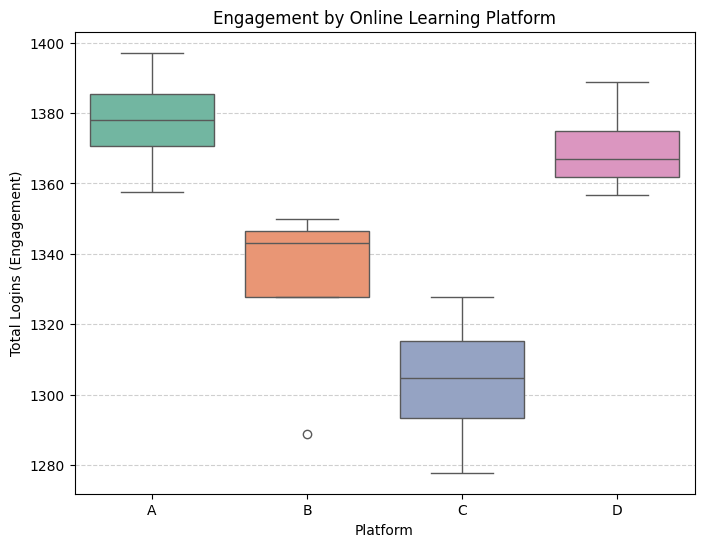

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
A,4.0,1377.77,16.34,1357.65,1370.57,1378.15,1385.34,1397.12
B,4.0,1331.26,28.51,1288.86,1327.79,1343.14,1346.61,1349.91
C,4.0,1303.82,21.02,1277.89,1293.42,1304.80,1315.20,1327.79
D,4.0,1369.82,13.75,1356.74,1361.79,1366.94,1374.97,1388.68


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df2=pd.read_excel("/content/STAT-7220-Applied-Experimental-Design/Assignments/HW2/Online Learning and Engagement.xlsx")
# Summary statistics by Platform
summary_stats2 = df2.groupby('Platform')['Engagement'].describe().round(2)

# Boxplot visualization for engagement by platform
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x='Platform', y='Engagement', palette='Set2')
plt.title("Engagement by Online Learning Platform")
plt.ylabel("Total Logins (Engagement)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

summary_stats2


Platform A shows the highest mean engagement, closely followed by Platform D.

Platform B and Platform C show lower mean engagement levels.

The relatively low standard deviations across platforms suggest consistent engagement within each platform’s assigned sections.

From the box plot we can see that Platforms A and D also have higher median engagement while B and C are much lower and tightly clustered

From those evidence, this show stronger support for alternative  hypothesis

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



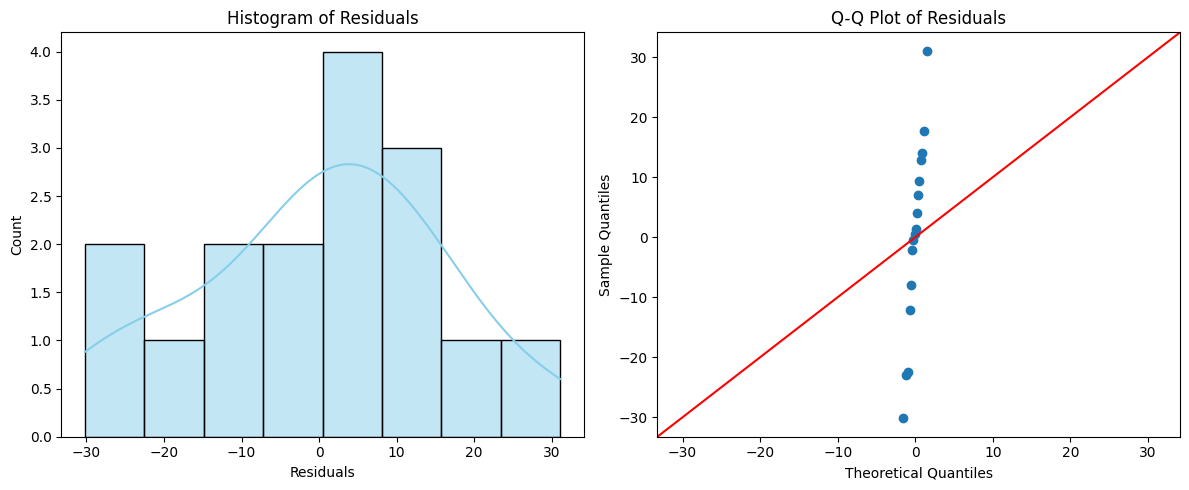

(                   sum_sq   df            F        PR(>F)
 C(Platform)  2.163185e+06  3.0  1639.526583  1.229404e-12
 C(Day)       1.175124e+03  3.0     0.890653  4.823487e-01
 C(Section)   2.434522e+06  3.0  1845.179206  7.230832e-13
 Residual     3.958188e+03  9.0          NaN           NaN,
 ShapiroResult(statistic=np.float64(0.9751694518478372), pvalue=np.float64(0.9137785828125332)))

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

# Build the three-way ANOVA model (Latin Square structure: Platform, Day, Section)
model3 = ols('Engagement ~ C(Platform) + C(Day) + C(Section)', data=df2).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)

# Extract residuals
residuals3 = model3.resid

# Shapiro-Wilk test for normality
shapiro_test3 = shapiro(residuals3)

# Visual normality checks
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(residuals3, bins=8, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residuals")

# Q-Q Plot
sm.qqplot(residuals3, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

anova_table3, shapiro_test3


Platform: Statistically significant effect (p < 0.001).

    Engagement levels differ significantly among the four online learning platforms.

Day: Not significant (p = 0.48).

    Engagement did not differ by day of the week.

Section (Time of Day): Statistically significant (p < 0.001).
    Engagement varied by time of day


Since p > 0.05, we fail to reject the null hypothesis of normality which mean the residuals are normally distributed.

The three-way ANOVA results indicate that both Platform and Section (Time of Day) have significant effects on engagement, while Day of the Week does not.
Normality checks (both visual and Shapiro–Wilk) support the assumption of normality, meaning the ANOVA model’s results are statistically valid and reliable.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



/tmp/ipython-input-2670840742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Platform', y='Engagement', palette='Set2')


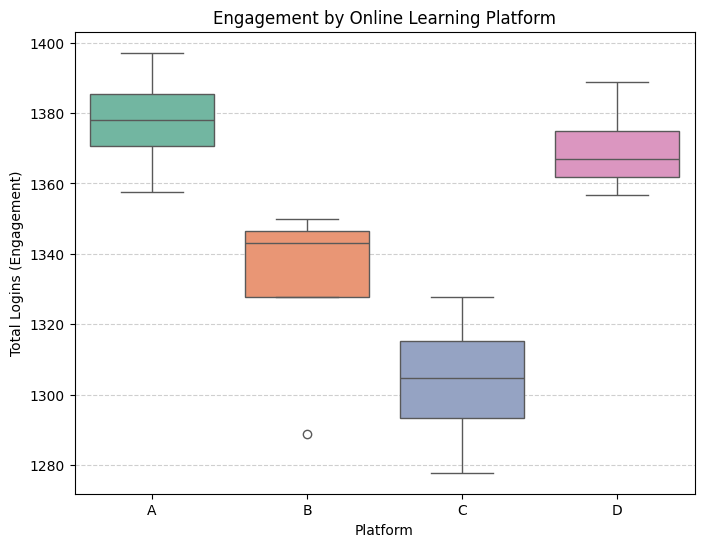

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
A,4.0,1377.77,16.34,1357.65,1370.57,1378.15,1385.34,1397.12
B,4.0,1331.26,28.51,1288.86,1327.79,1343.14,1346.61,1349.91
C,4.0,1303.82,21.02,1277.89,1293.42,1304.80,1315.20,1327.79
D,4.0,1369.82,13.75,1356.74,1361.79,1366.94,1374.97,1388.68


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics by Platform
summary_stats2 = df2.groupby('Platform')['Engagement'].describe().round(2)

# Boxplot visualization for engagement by platform
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x='Platform', y='Engagement', palette='Set2')
plt.title("Engagement by Online Learning Platform")
plt.ylabel("Total Logins (Engagement)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

summary_stats2


The descriptive statistics and boxplot show distinct differences between platform means

This suggests that platform choice influences engagement.

Therefore, the exploratory analysis provides stronger support for the alternative hypothesis

There are likely significant differences in engagement levels across the online learning platforms.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

The F-statistic is extremely large (1639.53), and the p-value (< 0.001) is below the 0.05 significance level.
This indicates a highly significant treatment effect — meaning that student engagement differs significantly among the four online learning platforms (A, B, C, and D).

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD post-hoc test for Platform
tukey3 = pairwise_tukeyhsd(endog=df2['Engagement'], groups=df2['Platform'], alpha=0.05)

# Display results
print(tukey3.summary())


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -46.505 0.0347  -89.9249  -3.0851   True
     A      C  -73.945 0.0014 -117.3649 -30.5251   True
     A      D   -7.945 0.9466  -51.3649  35.4749  False
     B      C   -27.44 0.2879  -70.8599  15.9799  False
     B      D    38.56 0.0881   -4.8599  81.9799  False
     C      D     66.0 0.0034   22.5801 109.4199   True
-------------------------------------------------------


Platform A vs. B: Significant — Platform A had ~46.5 more logins than B (p = 0.035).

Platform A vs. C: Significant — Platform A had ~74 more logins than C (p = 0.001).

Platform C vs. D: Significant — Platform D had ~66 more logins than C (p = 0.003).

All other comparisons: Not significant — no meaningful difference.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.

The results indicate that online learning platform choice significantly influences student engagement, while Day of the Week did not have a measurable effect. Both Platform and Time of Day (Section) showed significant effects in the three-way ANOVA (p < .001). Tukey’s HSD revealed that Platforms A and D generated higher engagement than Platforms B and C, with A and D performing similarly. These findings suggest that certain platform features promote greater student participation.
Some limitation of this experiment can be small sample size and by using login count as a main indicator can be limited on the result.